In [23]:
#Does explanatory variable(oil) do a good job of predicting the dependent variable (1 share of Exxon stock)

#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew


In [9]:
#Load the data
price_data = pd.read_excel('oil_exxon.xlsx')

In [10]:
#Use date column as index and check for errors with date
price_data.index = pd.to_datetime(price_data['date'])
price_data.head()

,date,exon_price,oil_price
date,,,
2014-03-28,2014-03-28,97.699997,106.64
2014-03-31,2014-03-31,97.680000,105.95
2014-04-01,2014-04-01,97.730003,105.70
2014-04-02,2014-04-02,97.949997,103.37
2014-04-03,2014-04-03,97.930000,104.88


In [11]:
#Get rid of old date column
price_data = price_data.drop(['date'], axis = 1)
price_data.head()


,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [12]:
#Check the data types
price_data.dtypes
#Looks like data types are ok and don't need to be changed

exon_price    float64
oil_price     float64
dtype: object

In [13]:
#Correct misspelled column name
new_column_names = {'exon_price': 'exxon_price'}

#Rename column
price_data = price_data.rename(columns = new_column_names)
price_data.head()


,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [14]:
#Check for missing values
price_data.isna().any()

exxon_price    False
oil_price       True
dtype: bool

In [15]:
#Drop missing values
price_data = price_data.dropna()
price_data.isna().any()

#No missing values in data frame

exxon_price    False
oil_price      False
dtype: bool

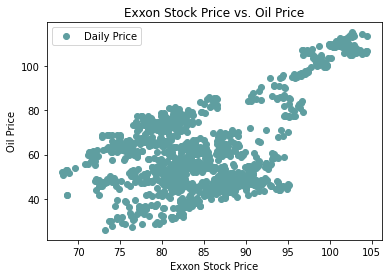

In [24]:
#Explore the data
#Define x and y data
x = price_data['exxon_price']
y = price_data['oil_price']

#Create scatter plot
plt.plot(x,y,'o', color = 'cadetblue', label = 'Daily Price')

#Scatter plot formatting/labeling
plt.title('Exxon Stock Price vs. Oil Price')
plt.xlabel('Exxon Stock Price')
plt.ylabel('Oil Price')
plt.legend()
plt.show()


In [25]:
#Measure correlation
price_data.corr()

#Approx 60% correlation between the two. Possibly significant?

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [26]:
#Create statistical summary
price_data.describe()

#No concerning outliers at first glance

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<AxesSubplot:title={'center':'exxon_price'}>,
        <AxesSubplot:title={'center':'oil_price'}>]], dtype=object)

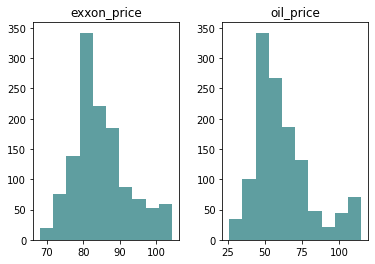

In [27]:
#Double check for outliers and look for skewness
price_data.hist(grid = False, color = 'cadetblue')

#Looks slightly skewed but want to quantify

In [36]:
#Calculate kurtosis. Fisher means kurtosis should be closer to 0 as opposed to 3
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher = True)

print("Exxon Kurtosis: {:.2}".format(exxon_kurtosis))

print("Oil Kurtosis: {:.2}".format(oil_kurtosis))

#Kurtosis for both variables is close to 0 and outliers are not a concern

Exxon Kurtosis: 0.088
Oil Kurtosis: 0.53


In [38]:
#Calculate skewness
exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])

print("Exxon Skew: {:.2}".format(exxon_skew))
print("Oil Skew: {:.2}".format(oil_skew))

#Exxon is moderately skewed and oil is on the cusp of being significantly skewed. Can opt for log transformation depending on how conservative we want to be

#If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

Exxon Skew: 0.66
Oil Skew: 1.0


In [42]:
#Perform kurtosis test

print(stats.kurtosistest(price_data['exxon_price']))

print(stats.kurtosistest(price_data['oil_price']))

#Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic. This is a normal distribution
#Any distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
#Any distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)
KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)


In [43]:
#Perform skew test

print(stats.skewtest(price_data['exxon_price']))
print(stats.skewtest(price_data['oil_price']))

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)
SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159923e-35)


In [47]:
#Split the data
Y = price_data.drop('oil_price', axis = 1)
X = price_data[['oil_price']]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state= 1)

#Create linear regression model object
regression_model = LinearRegression()

#pass through X_train and y_Train model
regression_model.fit(X_train, y_train)


LinearRegression()

In [48]:
#Explore output
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print("The coefficient for our model is {:.2}".format(coefficient))


The intercept for our model is 70.55
The coefficient for our model is 0.23


In [50]:
#Test a single prediction
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

#To interpret output, it would say that for a given barrel of oil at price 67.33 would predict an Exxon mobile stock price of 86.0

The predicted value is 86.0


In [51]:
#Test multiple predictions
y_predict = regression_model.predict(X_test)

#Show first 5 predictions
y_predict[:5]

#Evaluate the model

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

In [52]:
#Define the input
X2 = sm.add_constant(X)

#Create an OLS model
model = sm.OLS(Y, X2)

#Fit the model
est = model.fit()

#Condifence Intervals
est.conf_int()

#Interpreting the results, there is 95% confidence the oil price coefficient exists between 0.214 and 0.248


C:\Users\akcha\anaconda3\envs\myydemo\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


In [53]:
#Estimate the p-values
#Null Hypothesis: There is no relationship between the price of oil and the price of Exxon
#Alternative Hypothesis: There is a relationship between the price of oil and the price of Exxon and the coefficient is not 0

#If the null is rejected: There is a  relationship between oil price and the price of Exxon and the cofficient is not 0
#If the fail to reject the null: There is no relationship between oil price and the price of Exxon and the cofficient is 0

#Estimate the p-values
est.pvalues

#p-value < 0.05 therefore the null hypothesis is rejected and so there is relationship between the oil price and price of Exxon stock

#Calculate the MSE (mean squared error). MSE punishes larger error terms and is therefore more popular than MAE
model_mse = mean_squared_error(y_test, y_predict)

#Calculate the MAE (mean absolute error). MAE provides the mean of the absolute value of errors but doesn't provide direction (too high or low)
model_mae = mean_absolute_error(y_test, y_predict)

#Calculate RMSE (root mean squared error). RMSE is the square root of the mean of the squared error. RMSE is even more favored because it allows for interpretation of output in y-units
model_rmse = math.sqrt(model_mse)

#Print output
print("MSE {:.3}".format(model_mse))
print("MSE {:.3}".format(model_mae))
print("MSE {:.3}".format(model_rmse))

MSE 38.8
MSE 5.05
MSE 6.23


In [54]:
#Test goodness of fit with R-squared metric. Usually, higher R-squared metric means better goodnes of fit
#However, more features inflates the R-squared metric, therefore sometimes the adjusted R-squared is preferable which penalizes more complex models

model_r2 = r2_score(y_test, y_predict)
print("R2 {:.2}".format (model_r2))

#R-squared is 0.36, therefore the data explains 36% of the variance. Is this good/bad? This is ok for a stock model..
#Adding variables will make the R-squared error however this may not mean that the model is necessarily better

#Print summary
print(est.summary())

#Here, adjusted r-squared is very similar because the model is not complicated

R2 0.36
                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Sun, 05 Sep 2021   Prob (F-statistic):          1.42e-123
Time:                        13:54:52   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678 

<function matplotlib.pyplot.show(close=None, block=None)>

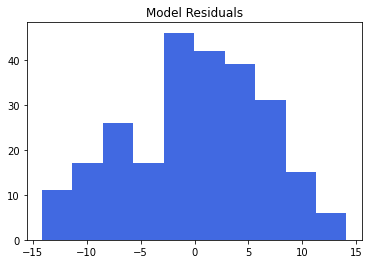

In [55]:
#Plot residuals
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show

#Normally distributed for the most part


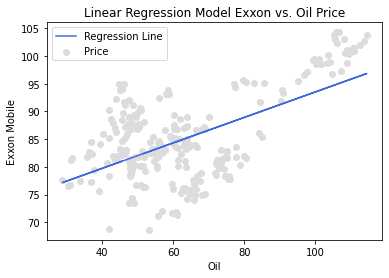

In [56]:
#Plot output
plt.scatter(X_test, y_test, color = 'gainsboro', label = 'Price')
plt.plot(X_test, y_predict, color = 'royalblue', label = 'Regression Line')

plt.title("Linear Regression Model Exxon vs. Oil Price")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()

In [57]:
#Save model for future use
import pickle
with open('my_linear_regression.sav', 'wb') as f:
    pickle.dump(regression_model,f)

#Load back in
with open('my_linear_regression.sav', 'rb') as f:
    regression_model_2 = pickle.load(f)

#Make new prediction
regression_model_2.predict([[67.33]])

array([[85.99798304]])